In [1]:
library(Seurat)
library(tidyseurat)

o <- function(w,h) options(repr.plot.width=w, repr.plot.height=h)

load('seu_ed_final.Robj')
ls()

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: ttservice

tidyseurat version 0.8.0
If you use TIDYSEURAT in published research, please cite:

Mangiola et al. Interfacing Seurat with the R tidy universe. Bioinformatics 2021.

This message can be suppressed by:
  suppressPackageStartupMessages(library(tidyseurat))
  
To restore the Seurat default display use options("restore_Seurat_show" = TRUE) 



Attaching package: ‘tidyseurat’


The following object is masked from ‘package:ttservice’:

    plot_ly




[1] "o"            "seu_ed_final"

# subset data according to their groups

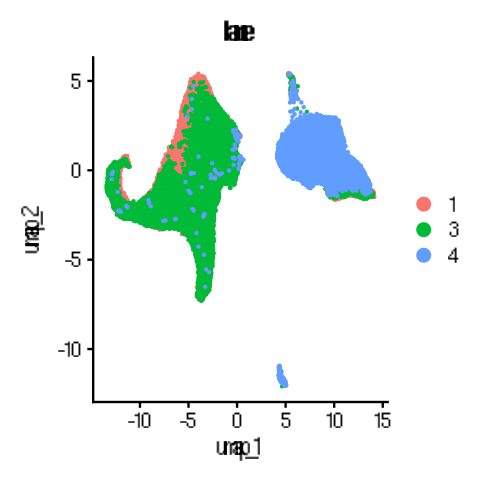

In [2]:
o(4,4)
DimPlot(seu_ed_final, group.by='lane')

In [3]:
seu.spl   <- seu_ed_final %>% filter(lane=='1')
seu.spl.t <- seu_ed_final %>% filter(lane=='3')
seu.pLN   <- seu_ed_final %>% filter(lane=='4')

In [4]:
seu.spl[[]]   $ group <- seu.spl[[]]   $ multi
seu.spl.t[[]] $ group <- seu.spl.t[[]] $ multi
seu.pLN[[]]   $ group <- seu.pLN[[]]   $ multi


seu.spl[[]]$group <- recode(seu.spl[[]]$group,
                 'Tag1' = "flox",
                 'Tag2' = "dXCR1")

seu.spl.t[[]]$group <- recode(seu.spl.t[[]]$group,
                 'Tag1' = "flox",
                 'Tag2' = "dXCR1")

seu.pLN[[]]$group <- recode(seu.pLN[[]]$group,
                 'Tag1' = "flox",
                 'Tag2' = "dXCR1")

In [5]:
seu.pLN = seu.pLN %>% NormalizeData() %>% FindVariableFeatures(nfeatures = 2000, selection.method = 'vst') %>% 
          ScaleData(features = rownames(.)) %>%RunPCA( verbose = F) %>% FindNeighbors( ) %>% RunUMAP(verbose=F, dims = 1:10) %>%
          FindClusters(resolution = 0.3, verbose = F) %>% FindClusters(resolution = 0.5, verbose = F) %>% FindClusters(resolution = 0.7, verbose = F) 


seu.spl.t = seu.spl.t %>% NormalizeData() %>% FindVariableFeatures(nfeatures = 2000, selection.method = 'vst') %>% 
          ScaleData(features = rownames(.)) %>%RunPCA( verbose = F) %>% FindNeighbors( ) %>% RunUMAP(verbose=F, dims = 1:10) %>%
          FindClusters(resolution = 0.3, verbose = F) %>% FindClusters(resolution = 0.5, verbose = F) %>% FindClusters(resolution = 0.7, verbose = F) 


seu.spl = seu.spl %>% NormalizeData() %>% FindVariableFeatures(nfeatures = 2000, selection.method = 'vst') %>% 
          ScaleData(features = rownames(.)) %>%RunPCA( verbose = F) %>% FindNeighbors( ) %>% RunUMAP(verbose=F, dims = 1:10) %>%
          FindClusters(resolution = 0.3, verbose = F) %>% FindClusters(resolution = 0.5, verbose = F) %>% FindClusters(resolution = 0.7, verbose = F) 


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
Computing nearest neighbor graph

Computing SNN

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
Computing nearest neighbo

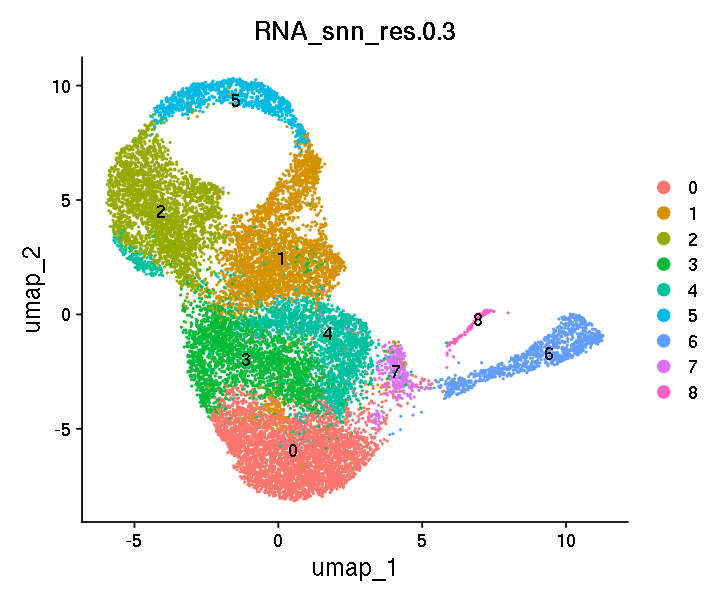

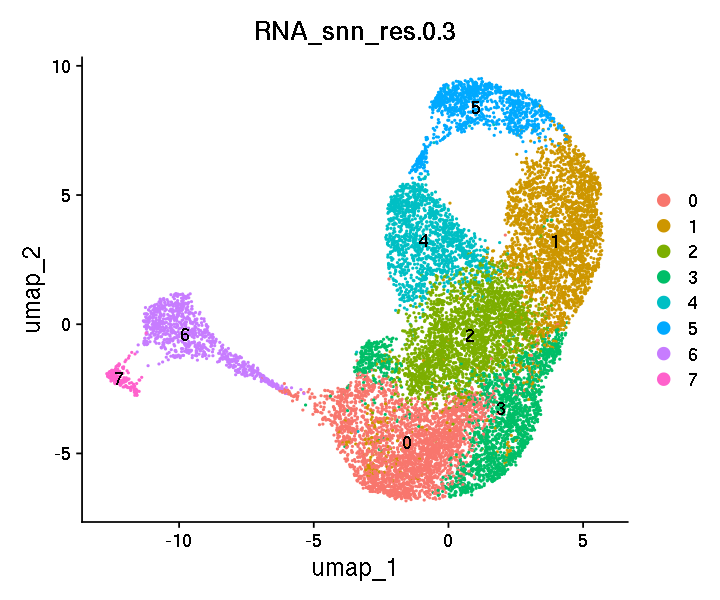

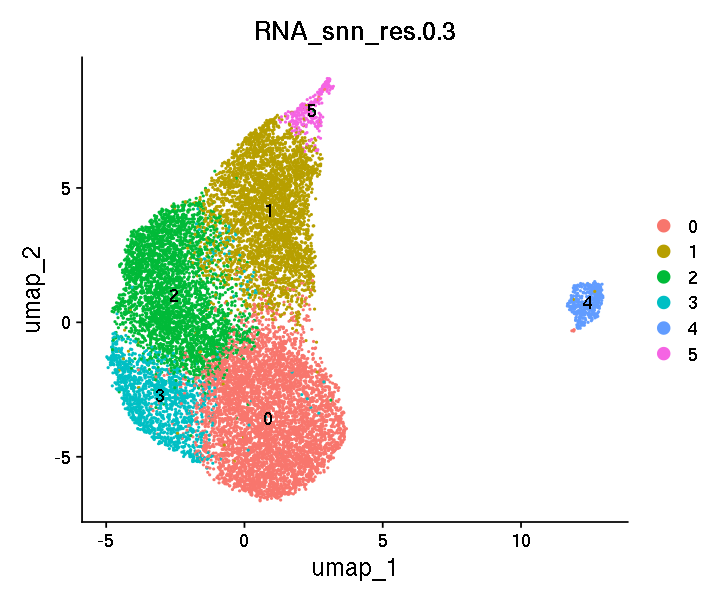

In [6]:
o(6,5)
DimPlot(seu.spl,   group.by='RNA_snn_res.0.3', label=T)
DimPlot(seu.spl.t, group.by='RNA_snn_res.0.3', label=T)
DimPlot(seu.pLN,   group.by='RNA_snn_res.0.3', label=T)

# data filtering

Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


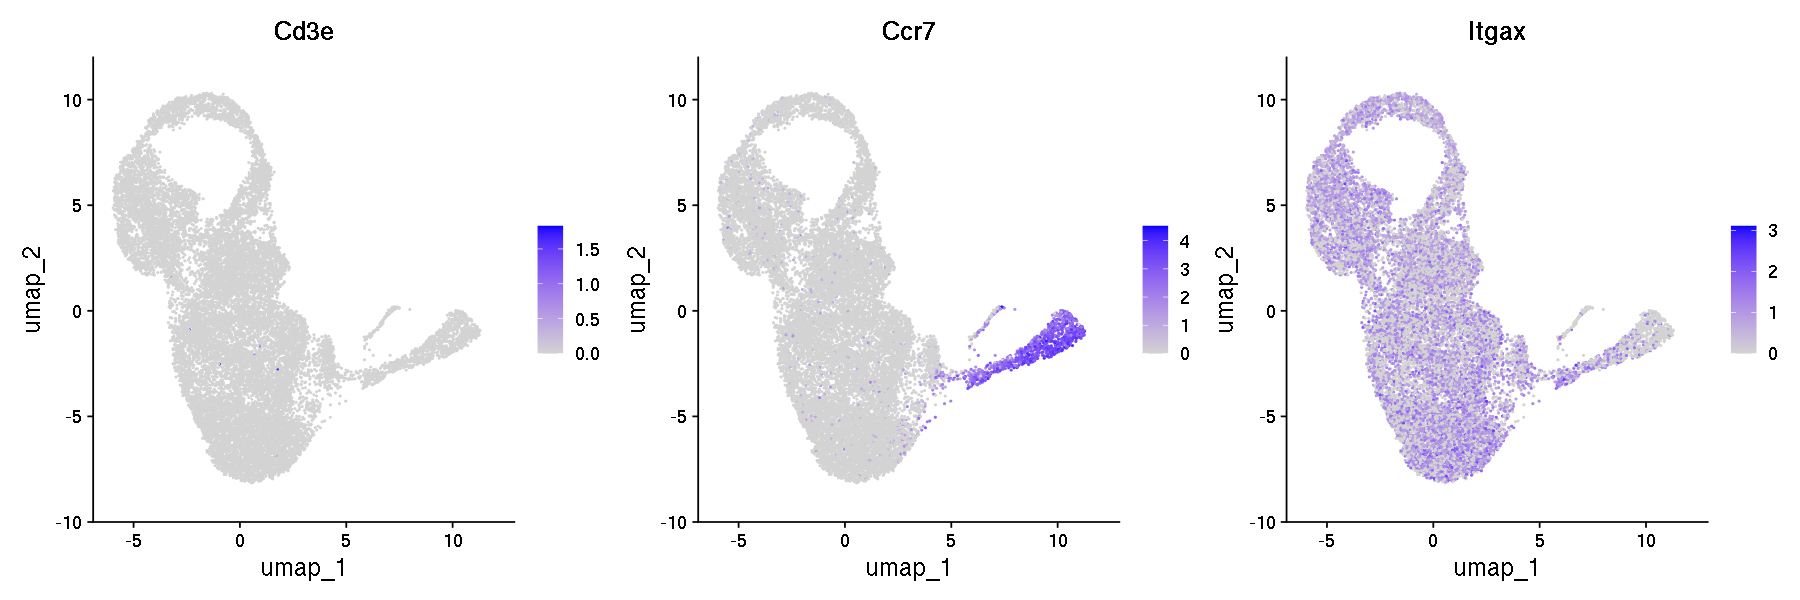

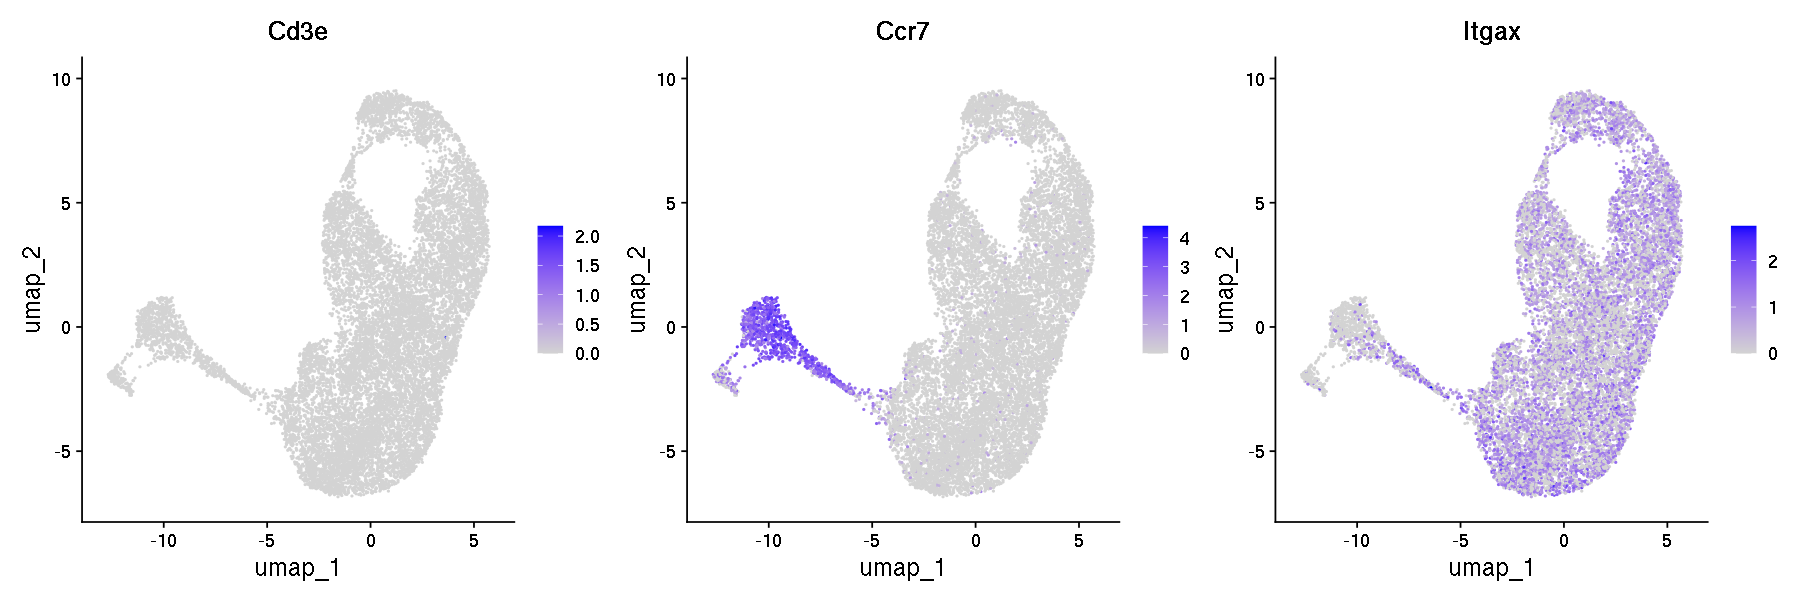

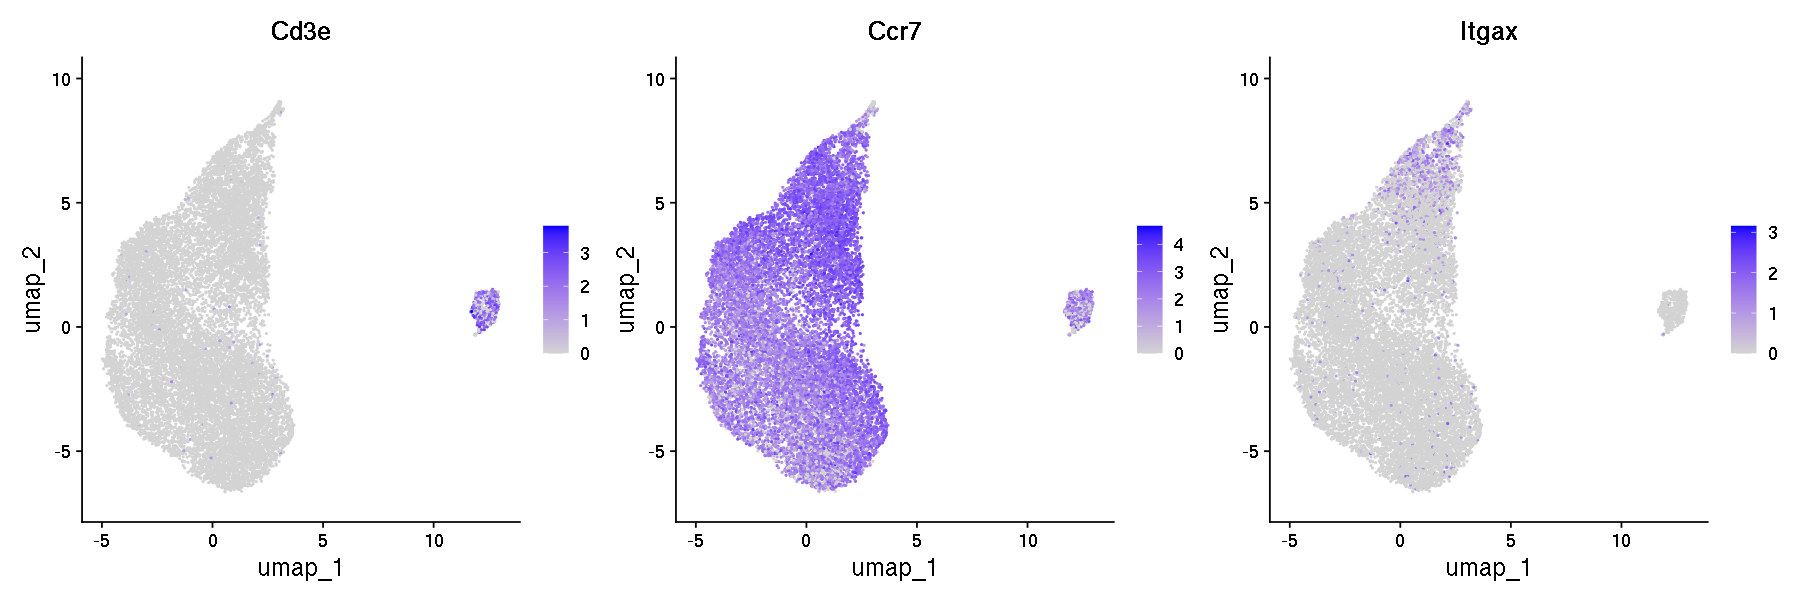

In [7]:
o(15,5)
FeaturePlot(seu.spl,   features = c('Cd3e','Ccr7','Itgax'), ncol = 3)
FeaturePlot(seu.spl.t, features = c('Cd3e','Ccr7','Itgax'), ncol = 3)
FeaturePlot(seu.pLN,   features = c('Cd3e','Ccr7','Itgax'), ncol = 3)

In [6]:
seu.spl   %>% filter( RNA_snn_res.0.3 =='6') -> seu.spl
seu.spl.t %>% filter( RNA_snn_res.0.3 =='6') -> seu.spl.t
seu.pLN   %>% filter( RNA_snn_res.0.3 !='4') -> seu.pLN

In [7]:
seu.pLN = seu.pLN %>% NormalizeData() %>% FindVariableFeatures(nfeatures = 2000, selection.method = 'vst') %>% 
          ScaleData(features = rownames(.)) %>%RunPCA( verbose = F) %>% FindNeighbors( ) %>% RunUMAP(verbose=F, dims = 1:10) %>%
          FindClusters(resolution = 0.3, verbose = F) %>% FindClusters(resolution = 0.5, verbose = F) %>% FindClusters(resolution = 0.7, verbose = F) 


seu.spl.t = seu.spl.t %>% NormalizeData() %>% FindVariableFeatures(nfeatures = 2000, selection.method = 'vst') %>% 
          ScaleData(features = rownames(.)) %>%RunPCA( verbose = F) %>% FindNeighbors( ) %>% RunUMAP(verbose=F, dims = 1:10) %>%
          FindClusters(resolution = 0.3, verbose = F) %>% FindClusters(resolution = 0.5, verbose = F) %>% FindClusters(resolution = 0.7, verbose = F) 


seu.spl = seu.spl %>% NormalizeData() %>% FindVariableFeatures(nfeatures = 2000, selection.method = 'vst') %>% 
          ScaleData(features = rownames(.)) %>%RunPCA( verbose = F) %>% FindNeighbors( ) %>% RunUMAP(verbose=F, dims = 1:10) %>%
          FindClusters(resolution = 0.3, verbose = F) %>% FindClusters(resolution = 0.5, verbose = F) %>% FindClusters(resolution = 0.7, verbose = F) 


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



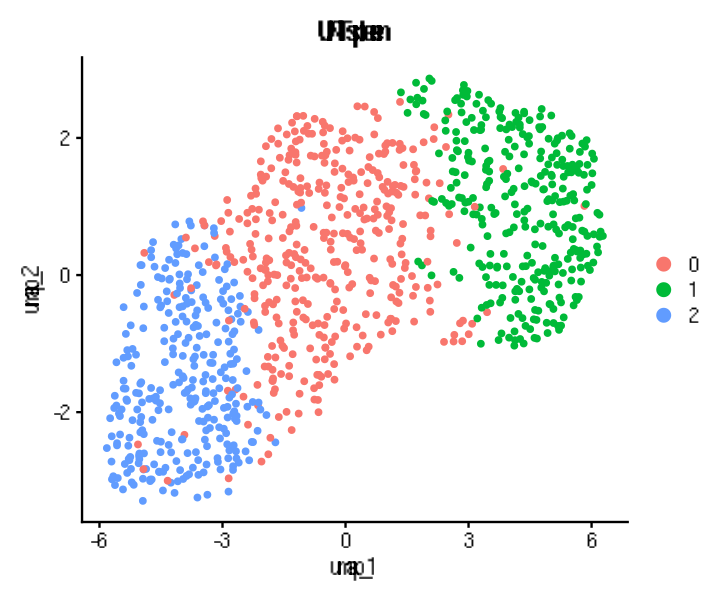

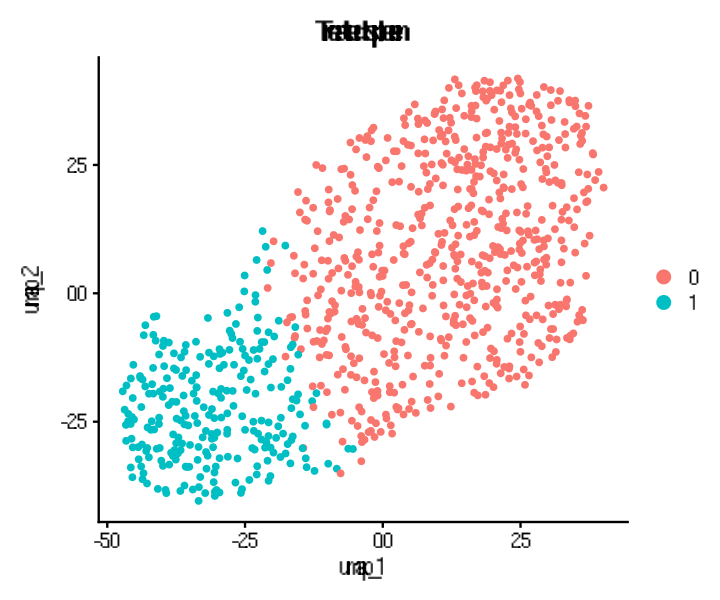

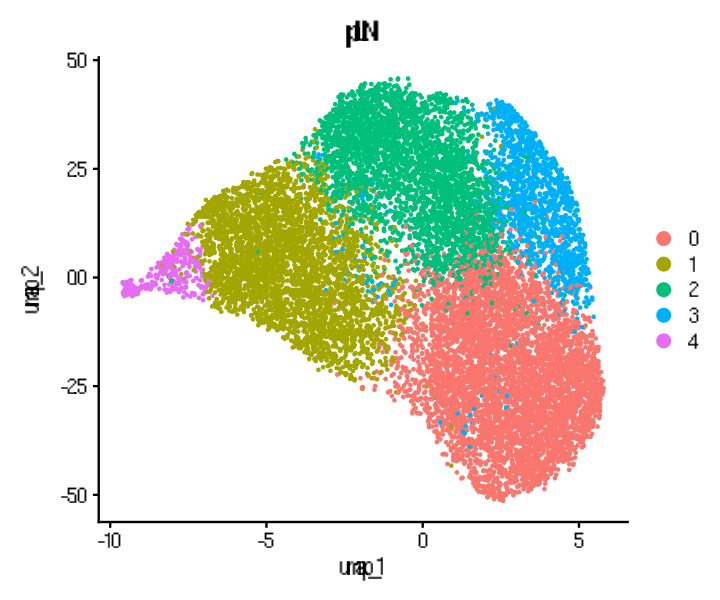

In [8]:
o(6,5)
DimPlot(seu.spl,   group.by='RNA_snn_res.0.3') + ggtitle('UNT spleen')
DimPlot(seu.spl.t, group.by='RNA_snn_res.0.3')+ ggtitle('Treated spleen')
DimPlot(seu.pLN,   group.by='RNA_snn_res.0.3')+ ggtitle('pLN')

In [9]:
Idents(seu.spl) <- 'RNA_snn_res.0.3'
deg.spl   <- FindAllMarkers(seu.spl,  only.pos = T, verbose = F)

Idents(seu.spl.t) <- 'RNA_snn_res.0.3'
deg.spl.t <- FindAllMarkers(seu.spl.t,only.pos = T, verbose = F)

Idents(seu.pLN) <- 'RNA_snn_res.0.3'
deg.pLN   <- FindAllMarkers(seu.pLN,  only.pos = T, verbose = F)

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


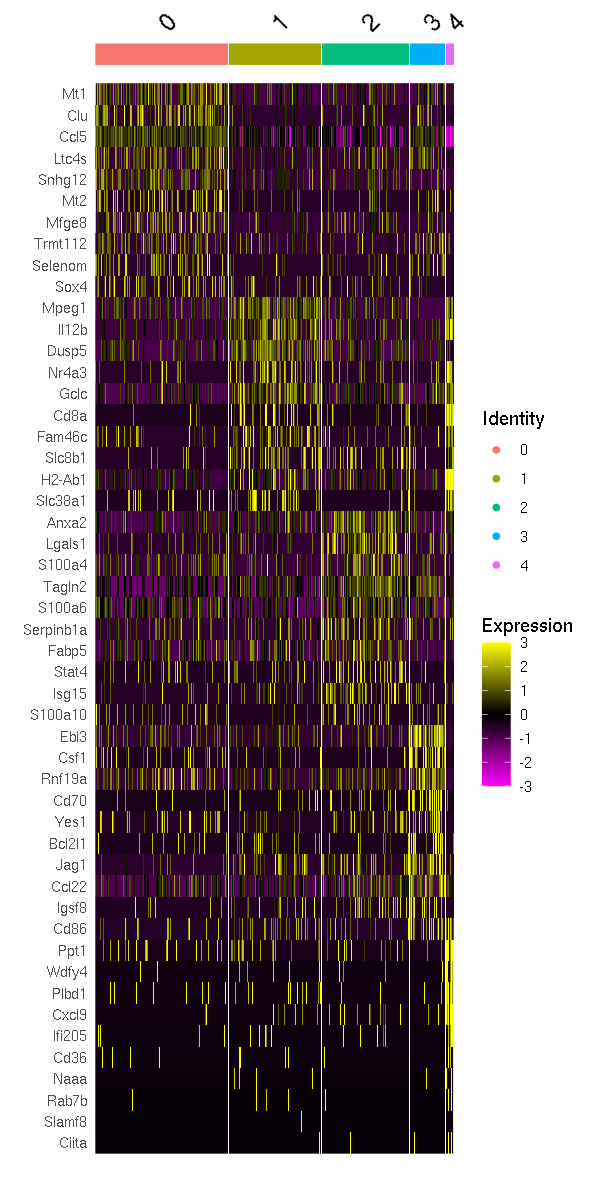

In [14]:
o(5,10)
#seu.spl$`RNA_snn_res.0.3` <- factor(seu.spl$`RNA_snn_res.0.3`, levels=c(1, 0, 2))
#Idents(seu.spl) <- 'RNA_snn_res.0.3'
DoHeatmap(seu.pLN, slot = 'scale.data', disp.min = -3, disp.max=3, 
          features = deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% pull(gene) %>% unique)

In [10]:
seu.pLN   %>% filter( RNA_snn_res.0.3 !='4') -> seu.pLN

In [11]:
seu.pLN = seu.pLN %>% NormalizeData() %>% FindVariableFeatures(nfeatures = 2000, selection.method = 'vst') %>% 
          ScaleData(features = rownames(.)) %>%RunPCA( verbose = F) %>% FindNeighbors( ) %>% RunUMAP(verbose=F, dims = 1:10) %>%
          FindClusters(resolution = 0.3, verbose = F) %>% FindClusters(resolution = 0.5, verbose = F) %>% FindClusters(resolution = 0.7, verbose = F) 


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



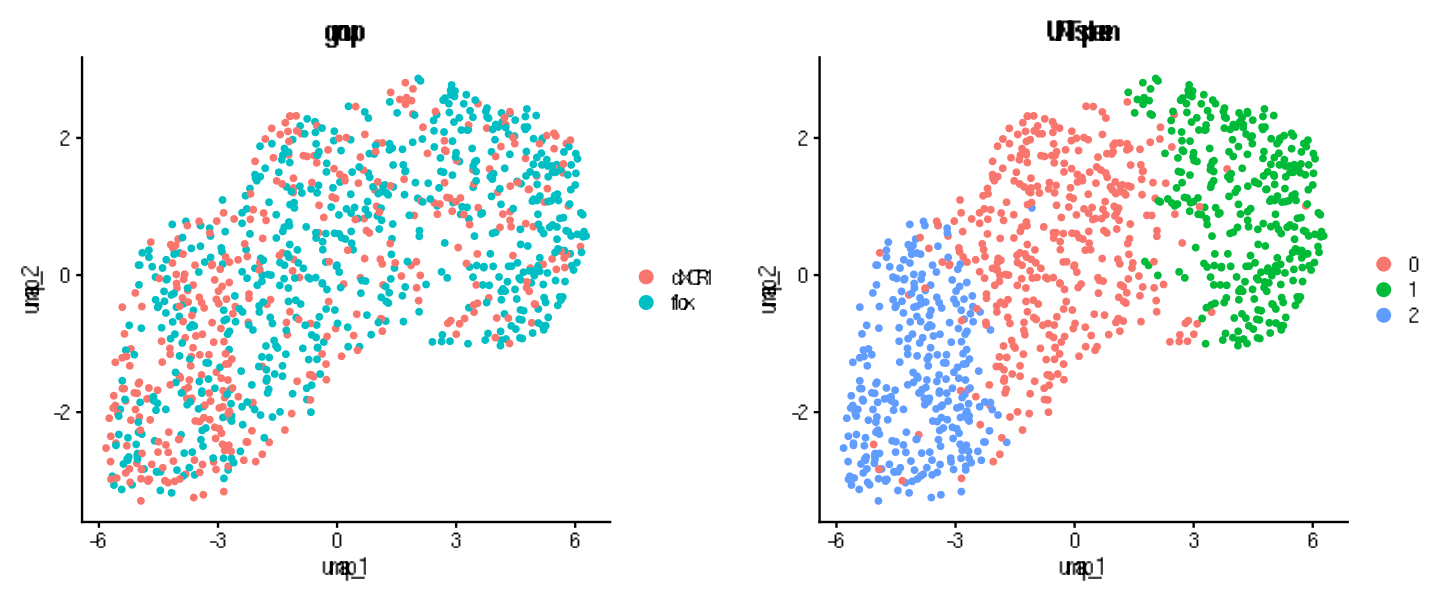

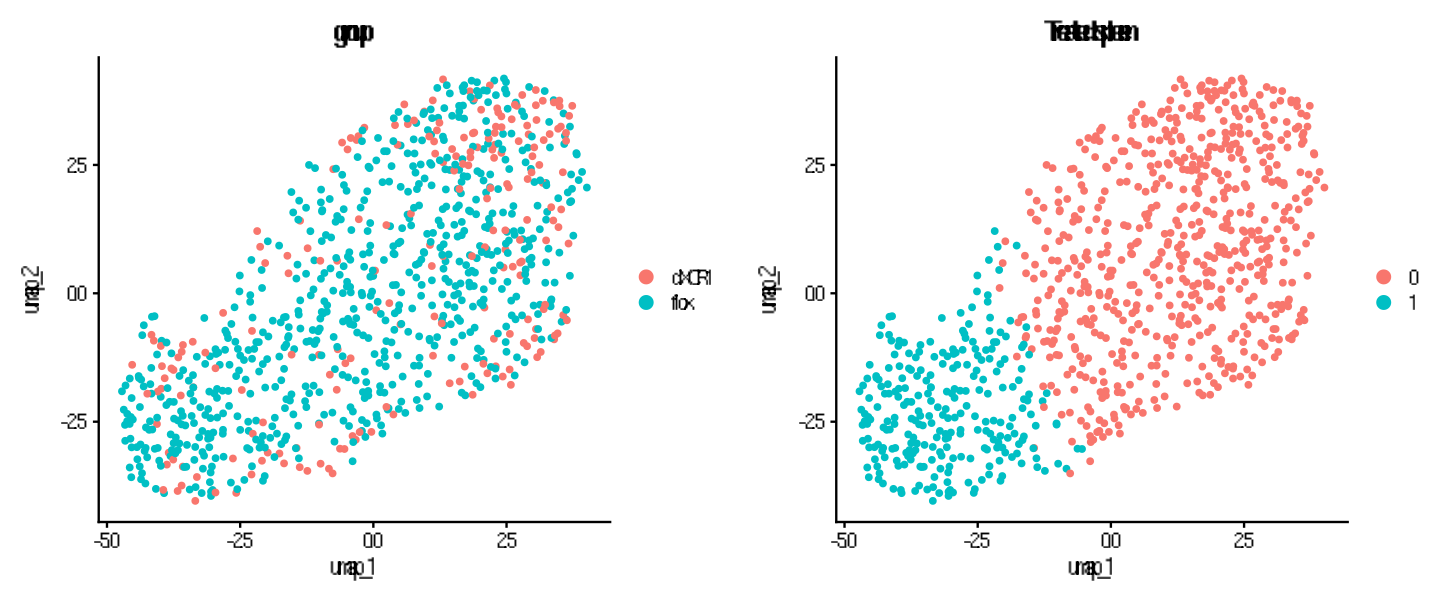

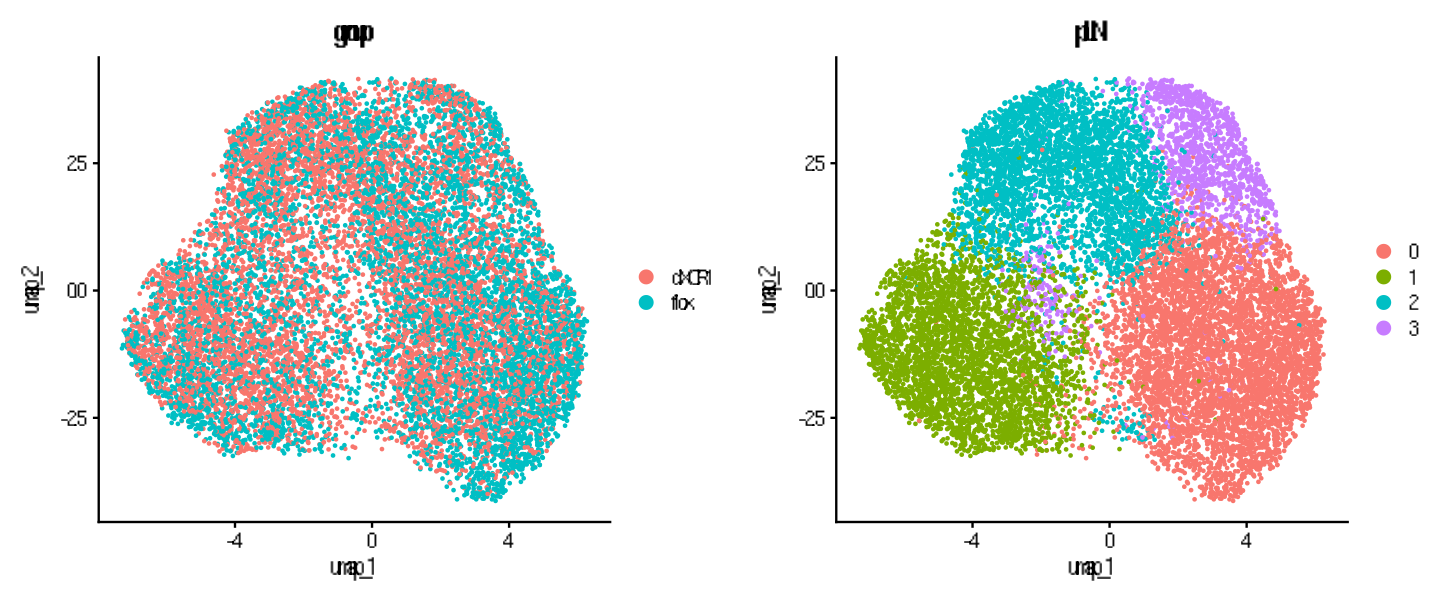

In [12]:
o(12,5)
DimPlot(seu.spl,   group.by=c('group','RNA_snn_res.0.3')) + ggtitle('UNT spleen')
DimPlot(seu.spl.t, group.by=c('group','RNA_snn_res.0.3'))+ ggtitle('Treated spleen')
DimPlot(seu.pLN,   group.by=c('group','RNA_snn_res.0.3'))+ ggtitle('pLN')

In [13]:
seu.spl.t<- FindClusters(seu.spl.t, resolution = 0.5, verbose = F)

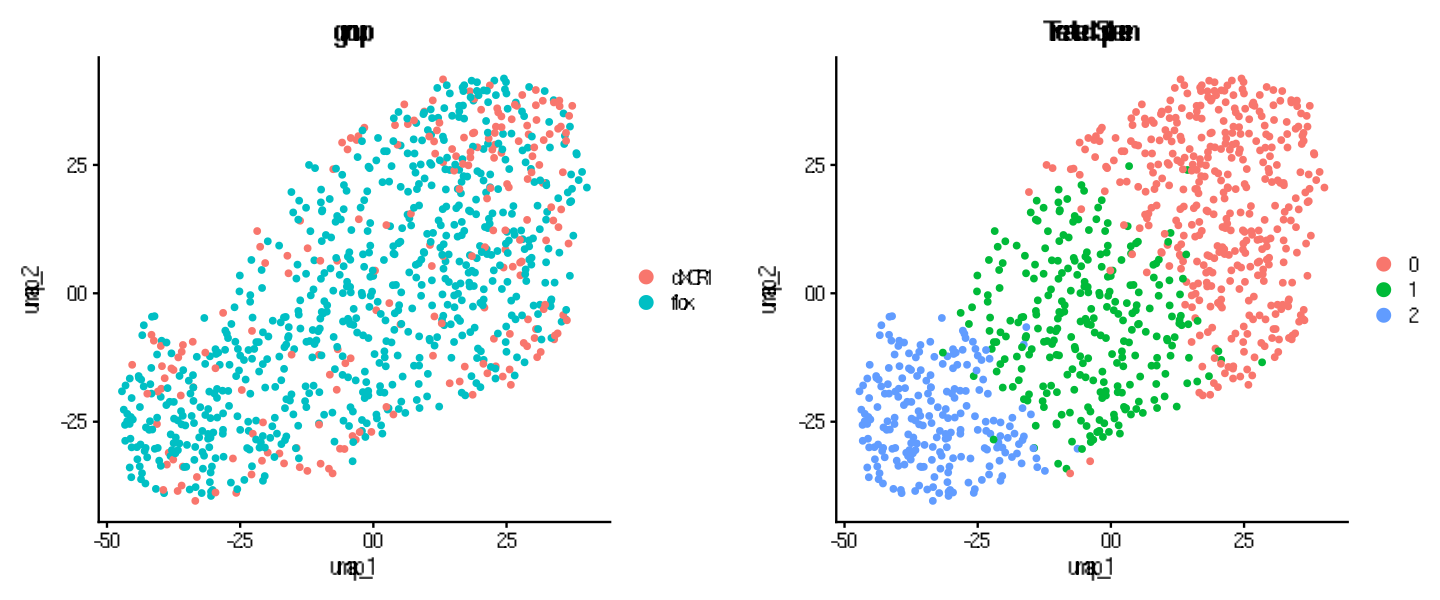

In [14]:
o(12,5)
DimPlot(seu.spl.t, group.by=c('group','RNA_snn_res.0.5'))+ggtitle('Treated Spleen')

In [15]:
Idents(seu.spl.t) <- 'RNA_snn_res.0.5'
deg.spl.t <- FindAllMarkers(seu.spl.t, only.pos = T, verbose = F)


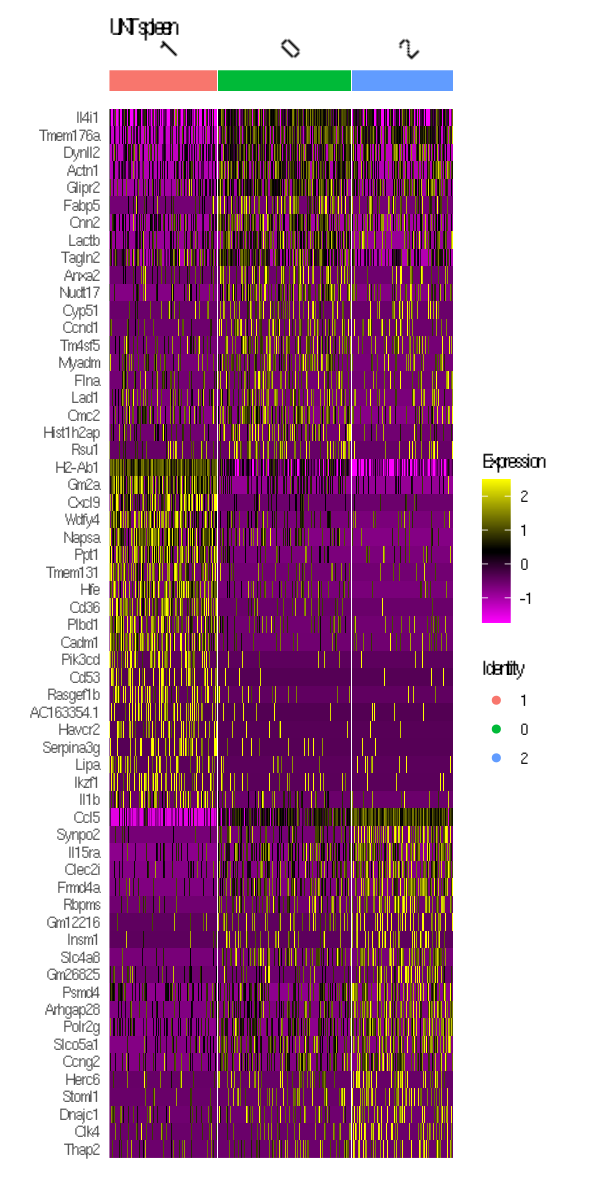

In [16]:
o(5,10)
seu.spl$`RNA_snn_res.0.3` <- factor(seu.spl$`RNA_snn_res.0.3`, levels=c(1, 0, 2))
Idents(seu.spl) <- 'RNA_snn_res.0.3'
DoHeatmap(seu.spl, features = deg.spl %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 20) %>% pull(gene) %>% unique) + ggtitle('UNT spleen')

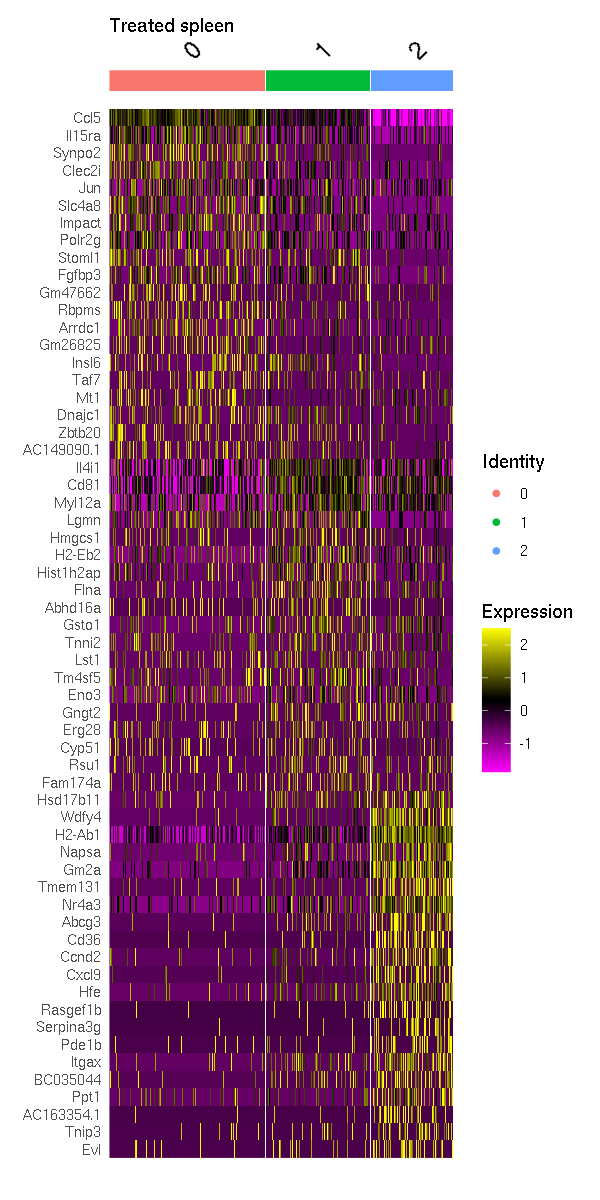

In [22]:
o(5,10)
seu.spl$`RNA_snn_res.0.5` <- factor(seu.spl$`RNA_snn_res.0.5`, levels=c(2, 1, 0))
Idents(seu.spl.t) <- 'RNA_snn_res.0.5'
DoHeatmap(seu.spl.t, features = deg.spl.t %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 20) %>% pull(gene) %>% unique) + ggtitle('Treated spleen')

In [25]:
saveRDS(seu.spl.t, file = 'seu.spl.t.rds')

In [26]:
saveRDS(seu.spl, file = 'seu.spl.rds')

In [ ]:
saveRDS(seu.pLN, file = 'seu.pLN.rds')

# calculate DEG

In [2]:
seu.spl.t = readRDS('seu.spl.t.rds')
seu.spl = readRDS('seu.spl.rds')
seu.pLN = readRDS('seu.pLN.rds')

In [3]:
Idents(seu.spl) <- 'RNA_snn_res.0.3'
deg.spl   <- FindAllMarkers(seu.spl,  only.pos = T, verbose = F)

Idents(seu.spl.t) <- 'RNA_snn_res.0.3'
deg.spl.t <- FindAllMarkers(seu.spl.t,only.pos = T, verbose = F)

Idents(seu.pLN) <- 'RNA_snn_res.0.3'
deg.pLN   <- FindAllMarkers(seu.pLN,  only.pos = T, verbose = F)

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [21]:
seu.pLN$group <- factor(seu.pLN$group, levels = c('flox', 'dXCR1'))

In [6]:
Idents(seu.spl) <- 'RNA_snn_res.0.3'
deg.spl   <- FindAllMarkers(seu.spl,  only.pos = T, verbose = F)

Idents(seu.spl.t) <- 'RNA_snn_res.0.3'
deg.spl.t <- FindAllMarkers(seu.spl.t,only.pos = T, verbose = F)

Idents(seu.pLN) <- 'RNA_snn_res.0.3'
deg.pLN   <- FindAllMarkers(seu.pLN,  only.pos = T, verbose = F)

# calculate signature gene scores

In [8]:
library(dittoSeq)
library(circlize)
library(dittoSeq)

In [9]:
LeiEtal=c(
  "Ache", "Actb", "Actg1", "Adam19", "Ankle2", "Antxr2", "Anxa6", "Arap2",
  "Arhgap22", "Arid5a", "Arl8b", "Arntl2", "Arrb2", "Atf5", "Atg3", "B2m",
  "Basp1", "Baz1a", "Bcl2a1", "Bcl2l14", "Birc3", "Blvra", "Bst2", "Bzw1",
  "Calhm6", "Ccl19", "Ccl5", "Ccr7", "Cd200", "Cd274", "Cd40", "Cd83", "Cd86",
  "Cdkn1a", "Celf2", "Cep135", "Cflar", "Clic2", "Clptm1", "Cntln", "Coa1",
  "Creg1", "Ctss", "Cul1", "Cxcl10", "Cxcl11", "Cxcl9", "Cyb5a", "Dapp1",
  "Depp1", "Dhx58", "Dnaja1", "Dnajb6", "Dnajc15", "Dst", "Dtx3l", "Dusp1",
  "Dusp22", "Dusp4", "Dynlt1", "Ebi3", "Eef1a1", "Ehd1", "Eif1", "Enthd1",
  "Epsti1", "Ergic1", "Erich1", "Etv7", "Fam129a", "Fam49a", "Fas", "Fbxo6",
  "Fgd2", "Flt3", "Fnbp1", "Fscn1", "G3bp2", "Gadd45b", "Gbp1", "Gbp2", "Gbp4",
  "Gbp5", "Gcsam", "Gpr132", "Grsf1", "Hapln3", "Hes4", "H2-K1", "H2-D1",
  "H2-Q7", "H2-Oa", "H2-T23", "H2-T22", "Hmsd", "Icam1", "Id2", "Ido1", "Ier3",
  "Ifi35", "Ifih1", "Ifngr2", "Il15", "Il15ra", "Il18bp", "Il2ra", "Il32",
  "Il4i1", "Il6ra", "Irf1", "Irf2", "Irf7", "Irf8", "Isg20", "Junb", "Kdm2b",
  "Kif2a", "Lactb", "Lad1", "Lamp3", "Lap3", "Lgmn", "Litaf", "Lmnb1", "Lsp1",
  "Ly75", "Maff", "Malat1", "Map3k13", "Marcks", "Marcksl1", "Mcl1", "Mgll",
  "Msrb1", "Mt2", "Mvp", "Myl6", "Myo1g", "N4bp2l1", "Naa25", "Nccrp1",
  "Ncoa7", "Nde1", "Necap2", "Nectin2", "Nfkb1", "Nfkbia", "Nmi", "Nub1",
  "Odf3b", "Optn", "Osbpl9", "Parp12", "Parp14", "Parp9", "Pcgf5", "Pfn1",
  "Pias1", "Pml", "Pnrc1", "Poglut1", "Pomp", "Ppa1", "Ppp1r18", "Prrg4",
  "Psd3", "Psma2", "Psmb10", "Psmb8", "Psmb9", "Psme1", "Psme2", "Ptk2b",
  "Ptpn1", "Rab10", "Rab29", "Rab8b", "Rab9a", "Ralb", "Rarres3", "Rassf4",
  "Rcn1", "Rdx", "Relb", "Rftn1", "Rgs1", "Rhof", "Ripk2", "Rnf115", "Rnf213",
  "Rragc", "Rsu1", "Samd9l", "Samsn1", "Sat1", "Sectm1", "Serpinb1", "Serpinb6",
  "Serpinb9", "Sinhcaf", "Slamf7", "Slc31a2", "Slco5a1", "Smco4", "Sms", "Snn",
  "Snx11", "Socs1", "Socs3", "Sod2", "Sppl2a", "Srgn", "Sri", "St3gal5",
  "Stat1", "Stat3", "Stom", "Sub1", "Syngr2", "Synpo2", "Tagln2", "Tap1",
  "Tap2", "Tapbp", "Tbc1d4", "Tbcb", "Themis2", "Tmsb10", "Tnfaip2", "Tnfaip3",
  "Tnip1", "Tnip2", "Tradd", "Traf1", "Trafd1", "Trip10", "Tspan13", "Tspan15",
  "Tspan33", "Tuba1c", "Tubb", "Tubb2a", "Tubb4b", "Tvp23a", "Txn", "Tymp",
  "Ubb", "Ubd", "Ube2e2", "Ube2f", "Ube2l6", "Vac14", "Vamp5", "Vopp1",
  "Wars", "Ybx3", "Zfas1", "Zfp36l1", "Znfx1")

In [22]:
table(seu.pLN$group)


dXCR1  flox 
 7225  6890 

In [10]:
seu.pLN <- AddModuleScore(
  object = seu.pLN,
  features = list(intersect(rownames(seu.pLN), LeiEtal)),    # 注意是 list
  name = "LeiEtal"              
)


# UMAP visualization

In [176]:
o(5,8)
library(ggpubr)
seu.pLN$group <- factor(seu.pLN$group, levels = c('flox', 'dXCR1'))
p = VlnPlot(seu.pLN, pt.size=0,  features = c('LeiEtal1'), group.by = 'group', cols=c('#939290','#f8766d'))


p = p+ 
  stat_compare_means(
    comparisons = list(c("flox", "dXCR1")),
    method = "wilcox.test",
    alternative = "less",  # Test flox < dXCR1
    label = "p.signif"     # or use "p.format" to show exact p-value
  )+ylim(c(0.2,1.1))+ ggtitle('CD4 T helper Signature (Lei et al.)')+
  geom_boxplot(
    width = 0.1,
    outlier.shape = NA,
    fill = NA,
    color = "black",
    position = position_dodge(width = 0.9)
  ) + scale_y_continuous(
      breaks = seq(0, 1, by = 0.2),  # Ticks at 0, 5, 10, ..., 40
      labels = seq(0, 1, by = 0.2)   # Optional: match labels to breaks
    )

pdf(file='CD4Thelper.sig.scores.pdf', width = 5, height = 8)
p
dev.off()

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


pdf 
  2

In [138]:
seu.spl.t@reductions$umap@cell.embeddings[ ,'umap_1'] <- -seu.spl.t@reductions$umap@cell.embeddings[ ,'umap_1']
seu.spl.t@reductions$umap@cell.embeddings[ ,'umap_2'] <- -seu.spl.t@reductions$umap@cell.embeddings[ ,'umap_2']

In [151]:
seu.spl[[]]$ann <- seu.spl[[]]$RNA_snn_res.0.3 %>% recode('1'='H2-Ab1+', '0'='Fabp5+', '2'='Ccl5+')
seu.spl.t[[]]$ann <- seu.spl.t[[]]$RNA_snn_res.0.5 %>% recode('2'='H2-Ab1+', '1'='Fabp5+', '0'='Ccl5+')

In [161]:
seu.spl$ann <- factor(seu.spl$ann, levels = c('Ccl5+','Fabp5+','H2-Ab1+'))
seu.spl.t$ann <- factor(seu.spl.t$ann, levels = c('Ccl5+','Fabp5+','H2-Ab1+'))

In [12]:
Idents(seu.pLN) <- 'RNA_snn_res.0.3'
seu.pLN <- RenameIdents(seu.pLN, '1'='1', '0'='2', '3'='3', '2'='4')
Idents(seu.pLN)  -> seu.pLN$ann250528

In [92]:
o(7,7)

pdf(file='pLN.umap.pdf', width = 7, height = 7)
DimPlot(seu.pLN, group.by = 'ann250528', label=T, label.size = 20, pt.size=1)+ theme(
  axis.line = element_blank(),      # Remove axis lines
  axis.ticks = element_blank(),     # Remove axis ticks
  axis.text = element_blank(),      # Remove axis labels and text
  axis.title = element_blank()      # Remove axis titles
) + ggtitle('pLN subpopulations')
dev.off()

pdf 
  2

# Heatmap visualization

In [14]:
Idents(seu.pLN) <- 'ann250528'
deg.pLN   <- FindAllMarkers(seu.pLN,  only.pos = T, verbose = F)

In [15]:
Idents(seu.pLN) <- 'ann250528'
Idents(seu.pLN) <- factor(Idents(seu.pLN), levels = c(1,2,3,4))

Warning message:
“Removed 172208 rows containing missing values or values outside the scale range (`geom_point()`).”


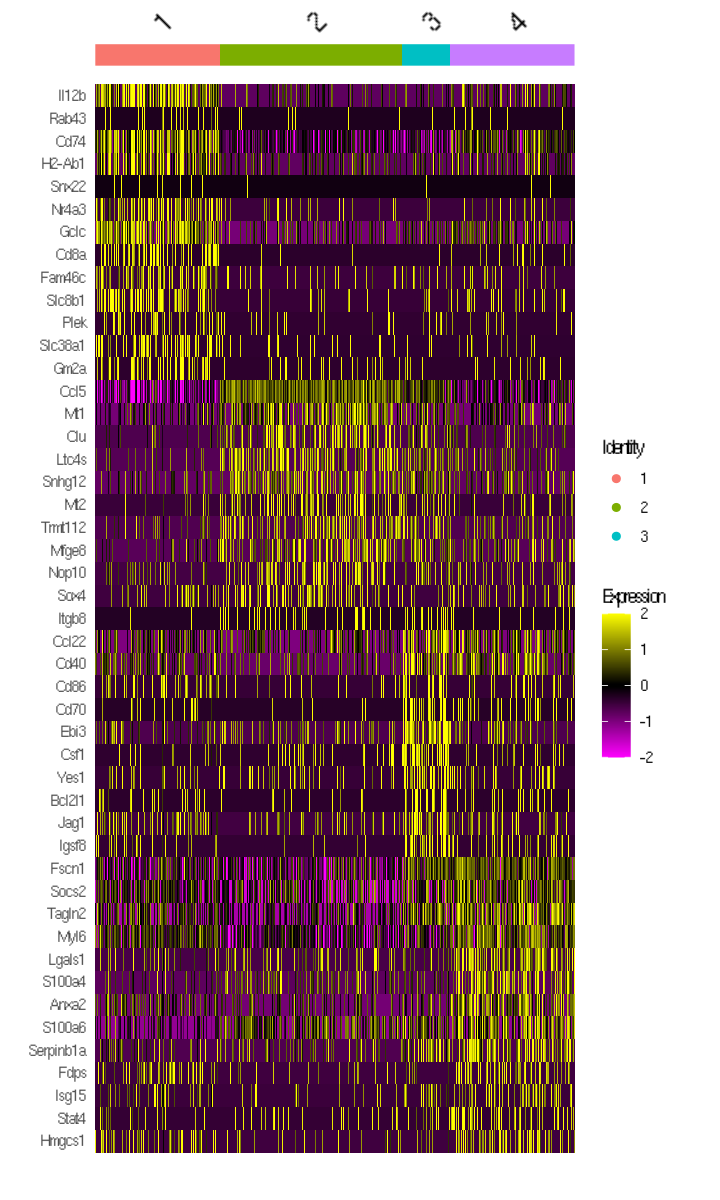

In [18]:

#seu.spl$`RNA_snn_res.0.3` <- factor(seu.spl$`RNA_snn_res.0.3`, levels=c(1, 0, 2))
#Idents(seu.spl) <- 'RNA_snn_res.0.3'

goi <- c(
  'Il12b', 'Rab43', 'Cd74', 'H2-Ab1', 'Snx22', 
  deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==1) %>% pull(gene),

  unique(c('Ccl5',
      deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==2) %>% pull(gene),
      'Itgb8')),

  'Ccl22','Cd40','Cd86','Cd70',
      deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==3) %>% pull(gene),
  
  
  'Fscn1', 'Socs2','Tagln2','Myl6',
  deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==4) %>% pull(gene)
)



p= DoHeatmap(seu.pLN, slot = 'scale.data', disp.min = -2, disp.max=2, 
          features =goi, raster=F, draw.lines = F
         )
o(6,10)
print(p)

In [197]:
o(5,10)
#seu.spl$`RNA_snn_res.0.3` <- factor(seu.spl$`RNA_snn_res.0.3`, levels=c(1, 0, 2))
#Idents(seu.spl) <- 'RNA_snn_res.0.3'

goi <- c(
  'Xcr1', 'Cd74', 'Snx22', 'Rab43',
  deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==1) %>% pull(gene),

  unique(c('Ccl5',
      deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==2) %>% pull(gene),
      'Itgb8')),

  'Ccl22','Cd40','Cd86','Cd70',
      deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==3) %>% pull(gene),
  
  
  'Fscn1', 'Socs2','Tagln2','Myl6',
  deg.pLN %>% filter(p_val_adj<0.05, pct.1>0.3) %>% group_by(cluster) %>% top_n(wt = avg_log2FC, n = 10) %>% filter(cluster==4) %>% pull(gene)
)



p= DoHeatmap(seu.pLN, slot = 'scale.data', disp.min = -2, disp.max=2, 
             features =goi, raster=F,  draw.lines = F
            )


pdf(file = 'pLN.DEG.png', width = 5, height = 10)
    print(p)
dev.off()


Warning message:
“Removed 175872 rows containing missing values or values outside the scale range (`geom_point()`).”


pdf 
  2

In [112]:
library(dittoSeq)

In [119]:
seu.pLN$group <- factor(seu.pLN$group, levels = c('flox','dXCR1'))
Idents(seu.pLN) <-'group'

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


pdf 
  2

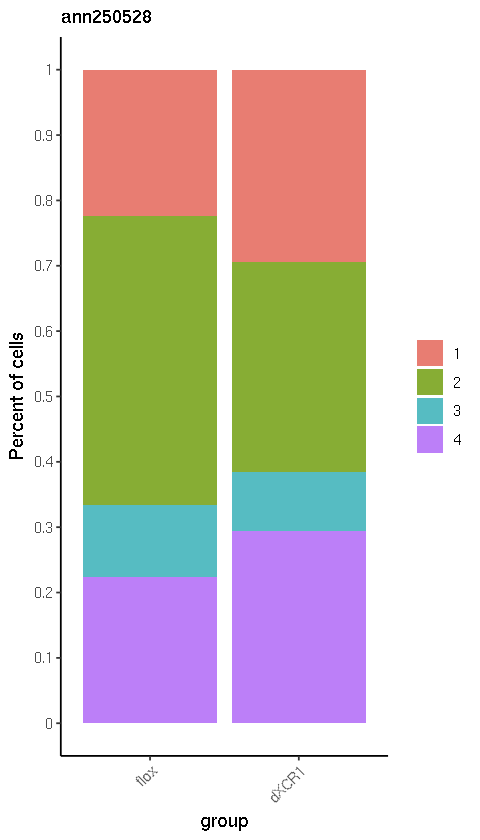

In [134]:
custom_colors <- c("#e87d72", "#87ad34", "#56bcc2", "#bc7ff8")

o(4,7)
p=dittoBarPlot(seu.pLN, "ann250528", group.by = "group",color.panel = custom_colors, x.reorder = c(2,1)
            )+ scale_y_continuous(
  breaks = seq(0, 1, by = 0.1),  # Ticks at 0, 5, 10, ..., 40
  labels = seq(0, 1, by = 0.1)   # Optional: match labels to breaks
)
p

pdf(file='pLN.StackedBar.pdf', width = 4, height = 7)
p
dev.off()

In [24]:
library("Nebulosa")

Loading required package: patchwork



In [34]:
o(5, 5)
pdf(file='pLN.Itgb8.pdf', width = 6, height = 5)
Nebulosa::plot_density(seu.pLN, c("Itgb8"))
dev.off()

pdf 
  2

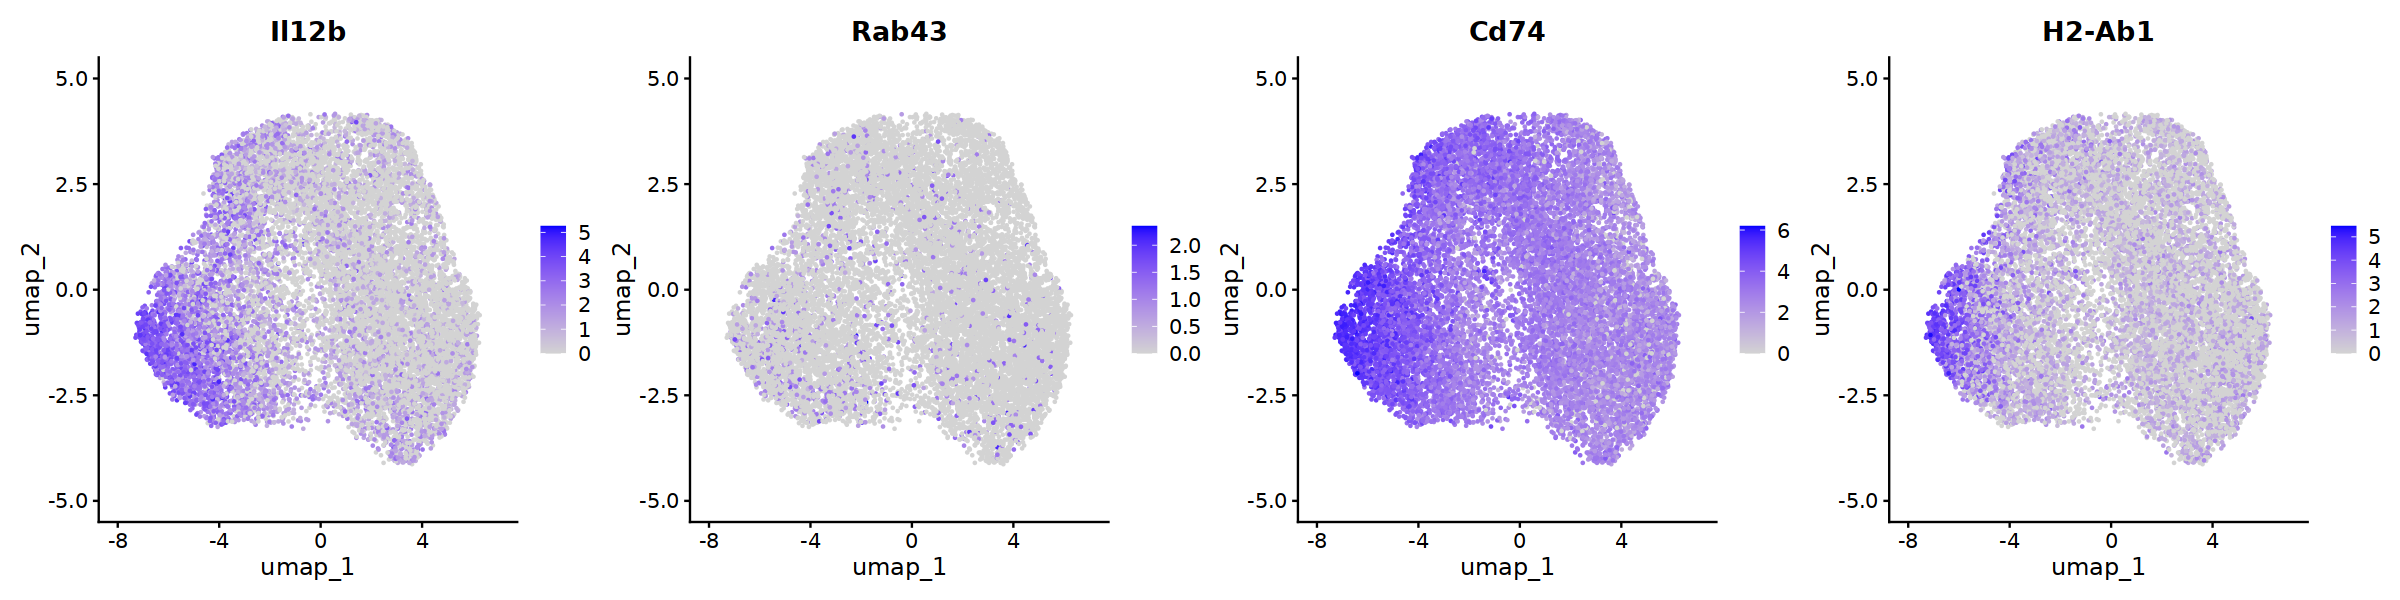

In [40]:
o(20,5)
FeaturePlot(seu.pLN, features = c('Il12b','Rab43','Cd74','H2-Ab1'),ncol = 4, slot = 'data')& theme(text = element_text(family = "sans"))

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

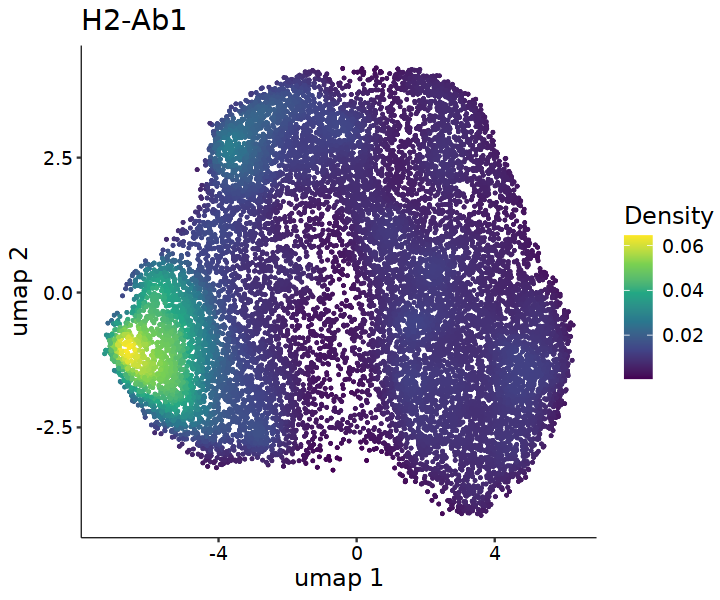

In [35]:
o(6,5)
Nebulosa::plot_density(seu.pLN, c("H2-Ab1"), pal='viridis')+  theme(text = element_text(family = "sans"))

pdf(file='pLN.Il12b.pdf', width = 6, height = 5)
Nebulosa::plot_density(seu.pLN, c("Il12b"), pal='viridis')+  theme(text = element_text(family = "sans"))
dev.off()

pdf(file='pLN.Rab43.pdf', width = 6, height = 5)
Nebulosa::plot_density(seu.pLN, c("Rab43"), pal='viridis')+  theme(text = element_text(family = "sans"))
dev.off()

pdf(file='pLN.Cd74.pdf', width = 6, height = 5)
Nebulosa::plot_density(seu.pLN, c("Cd74"), pal='viridis')+  theme(text = element_text(family = "sans"))
dev.off()

pdf(file='pLN.H2-Ab1.pdf', width = 6, height = 5)
Nebulosa::plot_density(seu.pLN, c("H2-Ab1"), pal='viridis')+  theme(text = element_text(family = "sans"))
dev.off()